In [111]:
!pip install statstests

In [112]:
!pip install pingouin

In [113]:
import pandas as pd
import pingouin as pg
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
import scipy as sci
from scipy.stats import f
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas as pd #manipulação de dados em formato de dataframe
import seaborn as sns #biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt #biblioteca de visualização de dados
import statsmodels.api as sm #biblioteca de modelagem estatística
import numpy as np #biblioteca para operações matemáticas multidimensionais
from scipy import stats #testes estatísticos
from statsmodels.iolib.summary2 import summary_col #comparação entre modelos
import plotly.graph_objs as go #gráfico 3D
from scipy.stats import pearsonr #correlações de Pearson
from statstests.process import stepwise #procedimento Stepwise
from scipy.stats import shapiro #teste de Shapiro-Wilk
from statstests.tests import shapiro_francia #teste de Shapiro-Francia
from statsmodels.stats.outliers_influence import variance_inflation_factor #diagnóstico de multicolinearidade
from statsmodels.stats.stattools import durbin_watson #teste de Durbin-Watson
import statsmodels.stats.diagnostic as dg #teste de Breusch-Godfrey
from scipy.stats import norm #para plotagem da distribuição normal no histograma
import statsmodels.formula.api as smf #regressão quantílica
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [114]:
qb = pd.read_excel('QB.xlsx')

In [115]:
qb.head()

,Jogador,Time,Tent,Compl,Por Tent,TD,PerTD,Int,PF
0,Philip Rivers,SD,478,312,8.39,34,7.1,11,105.5
1,Chad Pennington,MIA,476,321,7.67,19,4.0,7,97.4
2,Kurt Warner,ARI,598,401,7.66,30,5.0,14,96.9
3,Drew Brees,NO,635,413,7.98,34,5.4,17,96.2
4,Peyton Manning,IND,555,371,7.21,27,4.9,12,95.0


In [116]:
X = qb[['Tent','Compl','Por Tent','TD','PerTD','Int']]

Y = qb[['PF']]

In [117]:
modelo=(sm.OLS(Y,sm.add_constant(X)).fit())
modelo.summary(title='Sumario')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   Sumario                                    
==============================================================================
Dep. Variable:                     PF   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     47.70
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.72e-12
Time:                        23:29:11   Log-Likelihood:                -74.416
No. Observations:                  32   AIC:                             162.8
Df Residuals:                      25   BIC:                             173.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.9484     12.428      1.766      0.090      -3.647      47.543
Tent          -0.0250      0.030     -0.824      0.418      -0.088       0.038
Compl          0.1563      0.037      4.258      0.000       0.081       0.232
Por Tent       3.9072      0.933      4.188      0.000       1.986       5.829
TD            -1.1133      0.699     -1.593      0.124      -2.552       0.326
PerTD          8.9247      3.429      2.603      0.015       1.863      15.987
Int           -1.0204      0.169     -6.042      0.000      -1.368      -0.673
==============================================================================
Omnibus:                        0.334   Durbin-Watson:                   2.299
Prob(Omnibus):                  0.846   Jarque-Bera (JB):                0.230
Skew:                           0.192   Prob(JB):                        0.891
Kurtosis:                       2.841   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
#Pelo sumário podemos ver que as variaveis Numero de Tentativas e Numero de pases para Touchdowns não são signficativas
#para um nivel de significancia de 5%, portanto vamos utiliazar o metodo stepwise para estimar o modelo apenas com as
#variaveis significativas

In [119]:
# Estimação do modelo por meio do procedimento Stepwise
modelo_completo = stepwise(modelo, pvalue_limit=0.05)

# Parâmetros do 'modelo_completo' (output já obtido no código anterior)
modelo_completo.summary()

Regression type: OLS 

Estimating model...: 
 PF ~ Q('Tent') + Q('Compl') + Q('Por Tent') + Q('TD') + Q('PerTD') + Q('Int')

 Discarding atribute "Q('Tent')" with p-value equal to 0.4176987574478267 

Estimating model...: 
 PF ~ Q('Compl') + Q('Por Tent') + Q('TD') + Q('PerTD') + Q('Int')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('Tent')", 'p-value': 0.4176987574478267}

 Model after stepwise process...: 
 PF ~ Q('Compl') + Q('Por Tent') + Q('TD') + Q('PerTD') + Q('Int') 

                            OLS Regression Results                            
Dep. Variable:                     PF   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     57.82
Date:                Mon, 05 May 2025   Prob (F-statistic):           2.95e-13
Time:                        23:29:11   Log-Likelihood:     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PF   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     57.82
Date:                Mon, 05 May 2025   Prob (F-statistic):           2.95e-13
Time:                        23:29:11   Log-Likelihood:                -74.845
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      26   BIC:                             170.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        14.1731      8.038      1.763      0.090      -2.349      30.696
Q('Compl')        0.1424      0.032      4.394      0.000       0.076       0.209
Q('Por Tent')     3.8820      0.927      4.189      0.000       1.977       5.787
Q('TD')          -1.4731      0.542     -2.717      0.012      -2.587      -0.359
Q('PerTD')       10.7021      2.649      4.040      0.000       5.257      16.148
Q('Int')         -1.0217      0.168     -6.088      0.000      -1.367      -0.677
==============================================================================
Omnibus:                        0.272   Durbin-Watson:                   2.453
Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.279
Skew:                           0.190   Prob(JB):                        0.870
Kurtosis:                       2.747   Cond. No.                     4.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
#podemos ver que a variável Numero de tentativas foi removida, e a variável Numéro de pases paraTouchdowns
#se tornou significativa

In [121]:
f_crit=f.isf(0.05,5,26)
f_crit

np.float64(2.5867900870625906)

In [122]:
#Como Fstatistic > f_crit, podemos concluir que o modelo é significativo

In [123]:
#Observando o sumário, vemos que o valor 0 não pertence ao intervalo de confiança de nenhuma das variáveis, portanto
#podemos dizer que todas são significativas

In [124]:
#O coeficiente de determninação é 0.917, isso significa que 91,7% da variação da variável dependente pode ser explicada
#pela variação das variáveis independentes

In [125]:
#Vamos agora utilizar o teste de Shapiro-Francia para testar a normalidade dos residuos

In [126]:
# Teste de Shapiro-Wilk (já que o tamanho da amostra é menor que 30)
shapiro_francia(modelo_completo.resid)


method  :  Shapiro-Francia normality test
statistics W  :  0.9830592976839242
statistics z  :  -0.8586128823200263
p-value  :  0.8047229358008483


{'method': 'Shapiro-Francia normality test',
 'statistics W': np.float64(0.9830592976839242),
 'statistics z': np.float64(-0.8586128823200263),
 'p-value': np.float64(0.8047229358008483)}

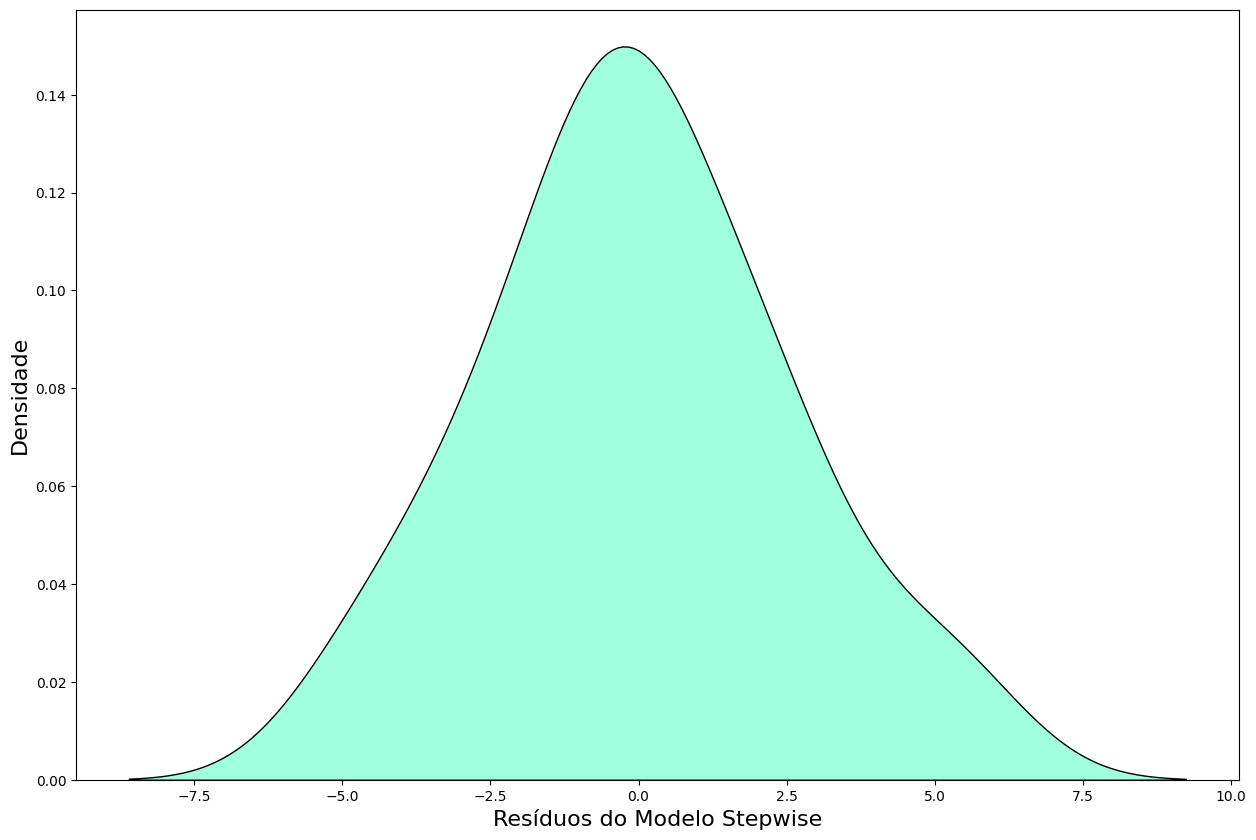

In [127]:
plt.figure(figsize=(15,10))
sns.kdeplot(data=modelo_completo.resid, multiple="stack",
            color='aquamarine')
plt.xlabel('Resíduos do Modelo Stepwise', fontsize=16)
plt.ylabel('Densidade', fontsize=16)
plt.show()

In [128]:
#como pvalue > 0.05, não rejeita-se a hipotese nula, portanto os dados não fogem da normalidade

In [129]:
# Estatísticas VIF (Variance Inflation Factor) e Tolerance das variáveis
#explicativas para o 'modelo_completo"
# Função 'variance_inflation_factor' do pacote
#'statsmodels.stats.outliers_influence'

# Para o 'modelo_completo'
X = qb[['Compl', 'Por Tent', 'TD', 'PerTD', 'Int']]  # Seleciona apenas as variáveis relevantes
X = sm.add_constant(X)  # Adiciona a constante para o cálculo do VIF

# Calcula VIF e Tolerance
vif1 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns
)
tolerance1 = 1 / vif1

# Exibe os resultados em uma tabela
resultado_vif = pd.concat([vif1, tolerance1], axis=1, keys=['VIF', 'Tolerance'])
print(resultado_vif)

                 VIF  Tolerance
const     266.808434   0.003748
Compl      22.949096   0.043575
Por Tent    2.102955   0.475521
TD         60.868943   0.016429
PerTD      27.426535   0.036461
Int         1.443739   0.692646


In [130]:
# Pelos resultados do teste de VIF, podemos obserar que Número de passes para touchdown possui uma multicolinearidade muito grave,
# Passes Completados e Percentagem de tentativas que são touchdown possuem uma multicolinearidade grave
# Jardas ganhas por tentativa de passe e Número de interceptações possuem uma multicolinearidade aceitável
# a multicolinearidade muito alta pode inflar os erros padrão dos coeficientes, tornando as estimativas instáveis e menos confiáveis

In [131]:
# vamos tentar resolver o problema de multicolinearidade combinando as variáveis

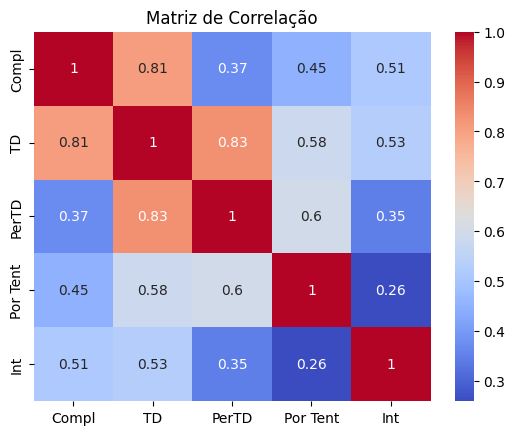

In [132]:
# Matriz de correlação
corr = qb[['Compl', 'TD', 'PerTD', 'Por Tent', 'Int']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

In [133]:
# analisando a correlação das variáveis, vamos combinar TD e PerTD em apenas uma nova variável através da média padronizada entre elas

In [134]:
# Padroniza e combina
scaler = StandardScaler()
qb[['TD_scaled', 'PerTD_scaled']] = scaler.fit_transform(qb[['TD', 'PerTD']])
qb['TD_PerTD_combined'] = (qb['TD_scaled'] + qb['PerTD_scaled']) / 2

# Modelo final (excluindo 'TD' e 'PerTD' originais)
X_novo = qb[['Compl', 'TD_PerTD_combined', 'Por Tent', 'Int']]

In [135]:
X_novo = sm.add_constant(X_novo)
vif_novo = pd.Series(
    [variance_inflation_factor(X_novo.values, i) for i in range(X_novo.shape[1])],
    index=X_novo.columns
)
print(pd.concat([vif_novo, 1/vif_novo], axis=1, keys=['VIF', 'Tolerance']))

                          VIF  Tolerance
const              155.570615   0.006428
Compl                1.839243   0.543702
TD_PerTD_combined    2.207643   0.452972
Por Tent             1.644280   0.608169
Int                  1.427131   0.700706


In [136]:
# agora removemos a multicolinearidade e o modelo está mais correto

In [137]:
# Teste de Breusch-Pagan/Cook-Weisberg para diagnóstico de heterocedasticidade

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})

    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))

    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()

    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)

    anova_table['sum_sq'] = anova_table['sum_sq']/2

    chisq = anova_table['sum_sq'].iloc[0]

    p_value = 1 - stats.chi2.cdf(chisq, 1)

    print(f"chisq: {chisq}")

    print(f"p-value: {p_value}")

    return chisq, p_value

In [138]:
# Teste de Breusch-Pagan propriamente dito

stat, p = breusch_pagan_test(modelo_completo)

# H0 do teste: ausência de heterocedasticidade no modelo estimado
# H1 do teste: existência de heterocedasticidade no modelo estimado

# Interpretação
print('Statistics=%.6f, p-value=%.7f' % (stat, p))
alpha = 0.05 #nível de significância
if p > alpha:
	print('Não se rejeita H0')
else:
	print('Rejeita-se H0')

chisq: 1.5927923952562726
p-value: 0.20692763170749184
Statistics=1.592792, p-value=0.2069276
Não se rejeita H0


In [139]:
# Como o nosso teste de Breusch-Pagan teve como resultado a não rejeição de H0, podemos dizer que não temos heterocedasticidade no nosso modelo e
# portanto temos homocedasticidade, que nos diz que podemos confiar nos erros padrões dos coeficientes, nos testes t e F, e nos intervalos de confiança
# sem a necessidade de ajuste

In [140]:
# agora vamos analisar o modelo pelas métricas MSE e MAE

In [141]:
Y = qb['PF']  # Valores reais
Y_pred = modelo_completo.predict()  # Valores previstos pelo modelo

mse = mean_squared_error(Y, Y_pred)
print(f"MSE: {mse:.4f}")
mae = mean_absolute_error(Y, Y_pred)
print(f"MAE: {mae:.4f}")

MSE: 6.2962
MAE: 1.9579


In [142]:
# pelos resultados do MAE, podemos concluir que as previsões do nosso modelo erram +/- 2 pontos feitos pelo quarterback
# e como o nosso MSE é maior que o quadrado do MAE, isso nos indica que temos alguns outliers que puxam esse valor pra cima